In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

##Loading the Dataset

In [ ]:
df = pd.read_excel('CalData.xlsx')
#MTM = median time on market
#PCS = Percent change of sales
#MPE = median prices of existing homes

In [ ]:
df = df.drop(labels=range(0, 12), axis=0)
df = df.reset_index()
df = df.drop(['index'], axis=1)

##Data Cleaning

In [ ]:
import datetime as dt

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df[:316]
test = df[316:]
train2 = train.copy()
test2 = test.copy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train.set_index('MonYr', inplace=True)
test.set_index('MonYr', inplace=True)

##Plotting the Data

[]

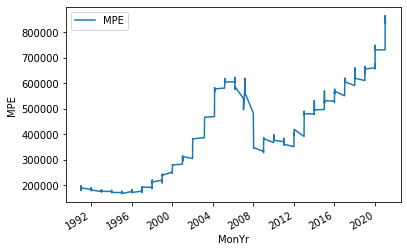

In [ ]:
#sns.lineplot(medianlpdf[])
from matplotlib.pyplot import figure

df.plot(x='MonYr', y='MPE')

plt.ylabel("MPE")
#figure(figsize=(8, 6), dpi=80)
plt.plot()

Text(0, 0.5, 'Median Listing Price - train')

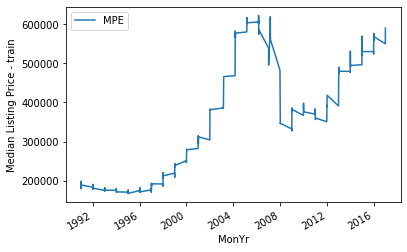

In [ ]:
train2.plot(x='MonYr', y='MPE')
plt.ylabel("Median Listing Price - train")

##Time Series Analysis

In [ ]:
import statsmodels.api as sm
#model=sm.tsa.statespace.SARIMAX(df['median_listing_price'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
#results=model.fit()

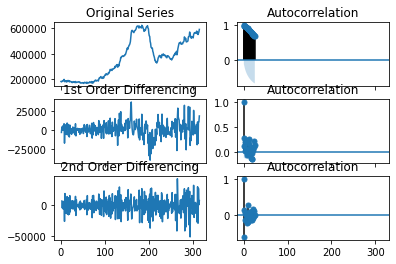

In [ ]:

#DIFFERENCING
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train2.MPE); axes[0, 0].set_title('Original Series')
plot_acf(train2.MPE, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train2.MPE.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train2.MPE.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train2.MPE.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train2.MPE.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
#thus d = 2

In [ ]:
#order of the AR term (p)
# PACF plot of 1st differenced series

#fig, axes = plt.subplots(1, 2, sharex=True)
#axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
#axes[1].set(ylim=(0,5))
#plot_pacf(df.value.diff().dropna(), ax=axes[1])


fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(train2.MPE.diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,5))
plot_pacf(train2.MPE.diff().dropna(), ax=axes[0,1])

axes[1,0].plot(train.MPE.diff().diff()); axes[1,0].set_title('2nd Differencing')
axes[1,1].set(ylim=(0,5))
plot_pacf(train.MPE.diff().diff().dropna(), ax=axes[1,1])

plt.show()
#thus p = 2

ValueError: ignored

In [ ]:
#order of the MA term (q)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train.MPE.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train.MPE.diff().dropna(), ax=axes[1])

plt.show()

#thus q = 2?

p = 2
d = 2
q = 5

In [ ]:
medianlp = train2[['MonYr', 'MPE']].copy()
medianlp.set_index('MonYr', inplace=True)

medianlptest = test2[['MonYr', 'MPE']].copy()
medianlptest.set_index('MonYr', inplace=True)

marketime = train2[['MonYr', 'MTM']].copy()
marketime.set_index('MonYr', inplace=True)

marketimetest = test2[['MonYr', 'MTM']].copy()
marketimetest.set_index('MonYr', inplace=True)

homesales = train2[['MonYr', 'PCS']].copy()
homesales.set_index('MonYr', inplace=True)

homesalestest = test2[['MonYr', 'PCS']].copy()
homesalestest.set_index('MonYr', inplace=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#sm.tsa.seasonal_decompose(df.asfreq('MS'), model = 'additive')
result = seasonal_decompose(medianlp, model='additive',freq=12, extrapolate_trend='freq')
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

In [ ]:
#print(result.seasonal)
seasonal = result.seasonal
check_stationarity(seasonal.MPE)

In [ ]:
#CHECK STATIONARY OR NOT - V HIGH P VALUE SO no not stationary
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(medianlp.MPE, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(medianlp, lags =12)
plt.xlabel("PACF Graph of Non-Seasonal Component")
plt.show()

#In the PACF graph the maximum lag with a value out the confidence intervals (in light blue) is 2, thus we can set P = 2

In [ ]:
plot_acf(medianlp, lags =12)
plt.xlabel("ACF Graph of Non-Seasonal Component")
plt.show()
#q = 5

In [ ]:
#SEASONAL ORDER P
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal.MPE, lags =12)
plt.show()

In [ ]:
#SEASONAL ORDER Q
plot_acf(seasonal.MPE, lags =12)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace import sarimax

In [ ]:
medianlp = medianlp.astype(float)
model_seasonal = sarimax.SARIMAX(medianlp, order=(2,2,12), seasonal_order=(1,0,2,12))
model_fit_seasonal = model_seasonal.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
#sarima training value rmse
rmsetrainsarima = model_fit_seasonal.predict(steps = 316)
#rmsetrainsarima = pd.DataFrame(training_model_items, columns=['forecast'])


In [ ]:
#sarima training value rmse
from statsmodels.tools.eval_measures import rmse
nrmse_train_seasonal = rmse(rmsetrainsarima, medianlp.MPE)/(np.max(medianlp.MPE)-np.min(medianlp.MPE))
nrmse_train_seasonal

0.034655684973442825

In [ ]:
#sarima test rmse
ts_pred_seasonal = model_fit_seasonal.forecast(steps=56)
ts_pred_seasonaldf = pd.DataFrame(ts_pred_seasonal, columns=['forecast'])
nrmse_seasonal = rmse(ts_pred_seasonal, medianlptest.MPE)/(np.max(medianlptest.MPE)-np.min(medianlptest.MPE))
nrmse_seasonal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0.15991978266430715

In [ ]:
further_forecast = model_fit_seasonal.forecast(steps=103)
further_forecastdf = pd.DataFrame(further_forecast, columns=['furtherforecast'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
further_forecastdf['furtherforecast'] = further_forecastdf['furtherforecast'].astype(float)

In [ ]:
further_forecastdf = further_forecastdf.drop(labels=range(316, 371), axis=0)

In [ ]:
datetime_seriesdf = pd.DataFrame(pd.date_range('2022-01-01',periods = 48, freq = "M"),columns=['MonYr'])
datetime_series = pd.date_range('2022-01-01',periods = 48, freq = "M")
#datetime_seriesdf = pd.DataFrame(datetime_series, columns=['MonYr'])
#datetime_seriesdf['MonYr'] = datetime_seriesdf['MonYr'].astype(float)

In [ ]:
further_forecastdf['MonYr'] = datetime_series

In [ ]:
further_forecastdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 371 to 418
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   furtherforecast  48 non-null     float64       
 1   MonYr            48 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


[]

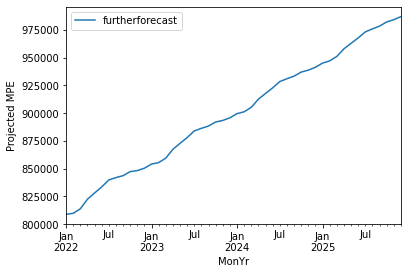

In [ ]:

plt.ylabel("Projected MPE")
plt.plot()

##Forecasting Plots

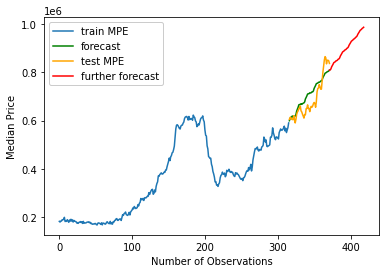

In [ ]:
#plot each series
#SARIMA FORECAST
plt.plot(train2['MPE'], label = "train MPE")
plt.plot(ts_pred_seasonaldf['forecast'], label = "forecast", color = 'green')
plt.plot(test2['MPE'], label = "test MPE", color = 'orange')
plt.plot(further_forecastdf['furtherforecast'], label = 'further forecast', color = 'red')
plt.legend(framealpha=1, frameon=True);
plt.ylabel("Median Price")
plt.xlabel("Number of Observations")
#display plot
plt.show()

##Model Evaluation


In [ ]:
#reset index of new forecast in order to plot residuals
newforecastdf = ts_pred_seasonaldf.reset_index()
newmedianlptest = medianlptest.reset_index()

In [ ]:
#predicted and actual values side by side
residualdf = pd.concat([newmedianlptest.MPE, newforecastdf.forecast], axis = 1)

In [ ]:
#df of the residuals
residuals = [residualdf.MPE - residualdf.forecast]
residuals = pd.DataFrame(residuals)

In [ ]:
residuals = residuals.T
#residuals

In [ ]:
from matplotlib import pyplot

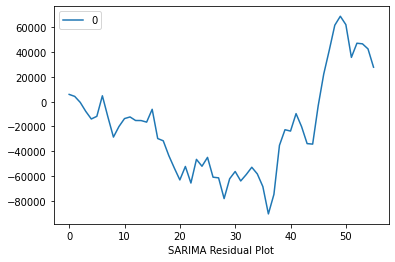

In [ ]:
residuals.plot()
pyplot.xlabel('SARIMA Residual Plot')
pyplot.show()

In [ ]:
#plotting the predication interval
#model_fit = model.fit()
ts_pred_seasonal= model_fit_seasonal.get_forecast(steps = 57)
PI_forecast = ts_pred_seasonal.predicted_mean
ci = ts_pred_seasonal.conf_int(alpha=0.1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
#ci = ci.reset_index()
#ci = ci.drop(['index'], axis=1)

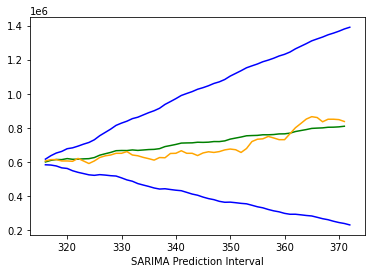

In [ ]:
plt.plot(ci['lower MPE'], color = 'blue')
plt.plot(ts_pred_seasonaldf['forecast'], color = 'green')
plt.plot(test2['MPE'], color = 'orange')
plt.plot(ci['upper MPE'], color = 'blue')
plt.xlabel('SARIMA Prediction Interval')
#display plot
plt.show()

##SARIMAX



In [ ]:
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
exog = np.empty([316, 2])

In [ ]:
exog = train2[['MonYr','MTM','PCS']].copy()
exog.set_index('MonYr', inplace=True)
exog_test = test2[['MonYr', 'MTM','PCS']].copy()
exog_test.set_index('MonYr', inplace=True)

In [ ]:
dftest = adfuller(train.MPE, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -1.2594957797619906
2. P-Value :  0.6474934434305479
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 300
5. Critical Values :
	 1% :  -3.4523371197407404
	 5% :  -2.871222860740741
	 10% :  -2.571929211111111


In [ ]:
sarimaxMPE = pm.auto_arima(medianlp, exogenous=exog,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=2, D=0, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

sarimaxMPE.summary()

In [ ]:
#medianlp = medianlp.astype(float)
model_exog_seasonal = sarimax.SARIMAX(medianlp, exog=exog, order=(0,2,1), seasonal_order=(2,0,1,12))
model_exog_fit_seasonal = model_exog_seasonal.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
from statsmodels.tools.eval_measures import rmse
ts_exog_pred_seasonal = model_exog_fit_seasonal.forecast(steps=56, exog=exog_test)
ts_exog_pred_seasonaldf = pd.DataFrame(ts_exog_pred_seasonal, columns=['forecast'])
nrmse_exog_seasonal = rmse(ts_exog_pred_seasonal, medianlptest.MPE)/(np.max(medianlptest.MPE)-np.min(medianlptest.MPE))
nrmse_exog_seasonal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


0.3168848588837258

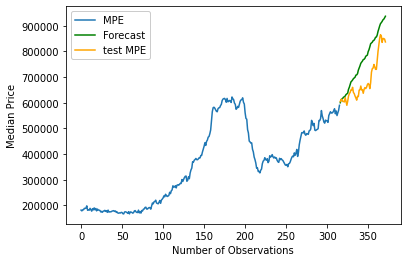

In [ ]:
plt.plot(train2['MPE'], label = 'MPE')
plt.plot(ts_exog_pred_seasonaldf['forecast'],label = 'Forecast', color = 'green')
plt.plot(test2['MPE'], label = 'test MPE', color = 'orange')
plt.legend(framealpha=1, frameon=True);
plt.ylabel("Median Price")
plt.xlabel("Number of Observations")
#display plot
plt.show()

##Evaluating the SARIMAX Model

homesales: 16.5%
marketime: 35%
homesales+marketime: 35%

In [ ]:
#SARIMAX training value rmse
rmsetrainsarimax = model_exog_fit_seasonal.predict(steps = 316)

In [ ]:
nrmse_train_sarimax= rmse(rmsetrainsarimax, medianlp.MPE)/(np.max(medianlp.MPE)-np.min(medianlp.MPE))
nrmse_train_sarimax

0.03125772406754193

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(medianlptest.MPE, ts_pred_seasonaldf['forecast'])

1934059227.109567

In [ ]:
mean_squared_error(medianlptest.MPE, ts_exog_pred_seasonal)

7593961042.850512

In [ ]:
#reset index of new forecast in order to plot residuals
newsarimaxforecastdf = ts_exog_pred_seasonaldf.reset_index()
newmedianlptest = medianlptest.reset_index()

In [ ]:
#predicted and actual values side by side
sarimaxresidualdf = pd.concat([newmedianlptest.MPE, newforecastdf.forecast], axis = 1)

In [ ]:
#df of the residuals
sarimaxresiduals = [sarimaxresidualdf.MPE - sarimaxresidualdf.forecast]
sarimaxresiduals = pd.DataFrame(sarimaxresiduals)

In [ ]:
sarimaxresiduals = sarimaxresiduals.T
#residuals

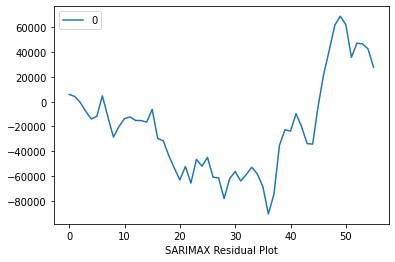

In [ ]:
sarimaxresiduals.plot()
pyplot.xlabel('SARIMAX Residual Plot')
pyplot.show()

In [ ]:
#plotting the predication interval
#model_fit = model.fit()
ts_exog_pred_seasonal= model_fit_seasonal.get_forecast(steps = 57)
PI_sarimaxforecast = ts_exog_pred_seasonal.predicted_mean
cisarimax = ts_exog_pred_seasonal.conf_int(alpha=0.1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
cisarimax = cisarimax.reset_index()
cisarimax = cisarimax.drop(['index'], axis=1)

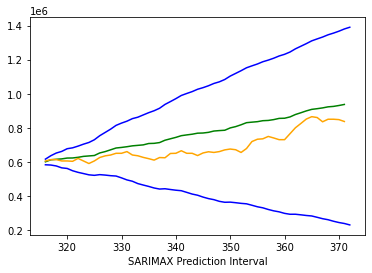

In [ ]:
plt.plot(cisarimax['lower MPE'], color = 'blue')
plt.plot(ts_exog_pred_seasonaldf['forecast'], color = 'green')
plt.plot(test2['MPE'], color = 'orange')
plt.plot(cisarimax['upper MPE'], color = 'blue')
plt.xlabel('SARIMAX Prediction Interval')
#display plot
plt.show()